# **Tugas Praktikum 11 - Convolutional Neural Netword (CNN)**

Nama : Alfan Olivan

NIM : 2141720078

## **Tugas Praktikum**

### 1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

* Import & Preproces Data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


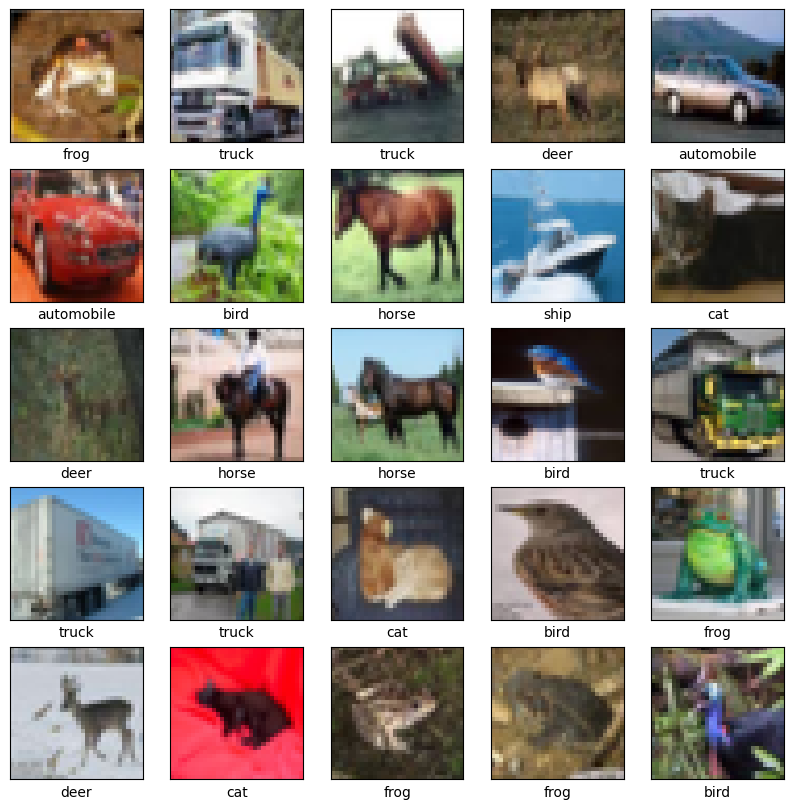

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

* Define Model

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [6]:
model.compile(optimizer = "adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 30s 10ms/step - loss: 1.6162 - accuracy: 0.4901 - val_loss: 1.1487 - val_accuracy: 0.6081
Epoch 2/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9906 - accuracy: 0.6602 - val_loss: 0.7891 - val_accuracy: 0.7272
Epoch 3/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8097 - accuracy: 0.7190 - val_loss: 0.7302 - val_accuracy: 0.7379
Epoch 4/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7090 - accuracy: 0.7519 - val_loss: 0.7978 - val_accuracy: 0.7343
Epoch 5/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6272 - accuracy: 0.7815 - val_loss: 0.6425 - val_accuracy: 0.7804
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5702 - accuracy: 0.8025 - val_loss: 0.6511 - val_accuracy: 0.7703
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5247 - accuracy: 0.8163 - val_loss: 0.5574 - val_

* Evaluate Model

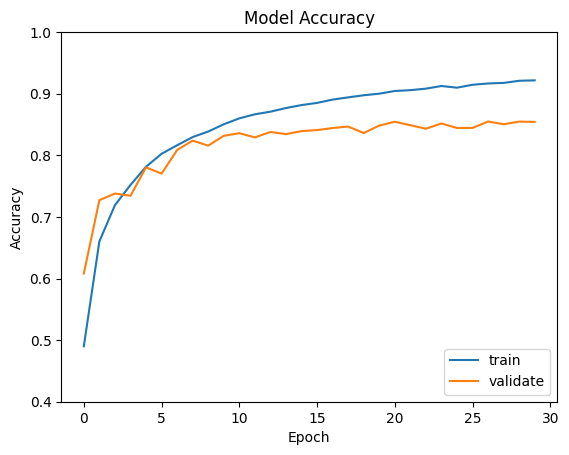

In [8]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

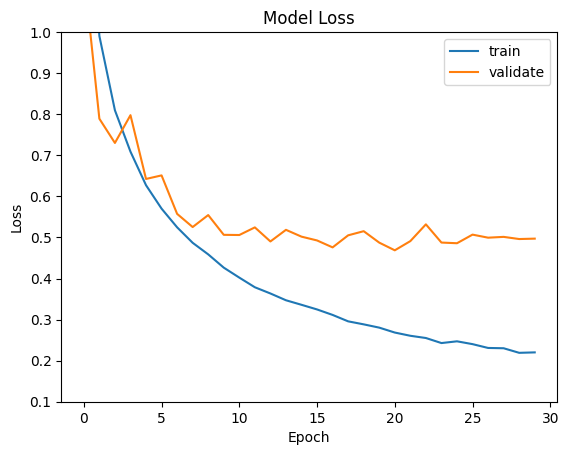

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 1])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

### 2. Buatlah model CNN untuk klasifikasi dataset MNIST.

* Import Library

In [10]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras import layers
from keras import backend as k

* Load Dataset

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


* Normalisasi Dataset

In [12]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

* Make Model

In [13]:
model_mnist = models.Sequential()

model_mnist.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=inpx, activation='elu'))
model_mnist.add(layers.Conv2D(64, kernel_size=(3,3), activation='elu'))
model_mnist.add(layers.MaxPooling2D(pool_size=(3,3)))
model_mnist.add(layers.Dropout(0.5))
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(256, activation='sigmoid'))
model_mnist.add(layers.Dense(10, activation='softmax'))

model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               1048832   
                                                      

* Compile Model


In [14]:
model_mnist.compile(optimizer="adam",
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])

* Run Model

In [15]:
history = model_mnist.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1431 - accuracy: 0.9570 - val_loss: 0.0500 - val_accuracy: 0.9849
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.0393 - val_accuracy: 0.9877
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0345 - val_accuracy: 0.9892
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0326 - val_accuracy: 0.9887
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0365 - val_accuracy: 0.9870
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0311 - val_accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0311 - val_accura

* Evaluate Model

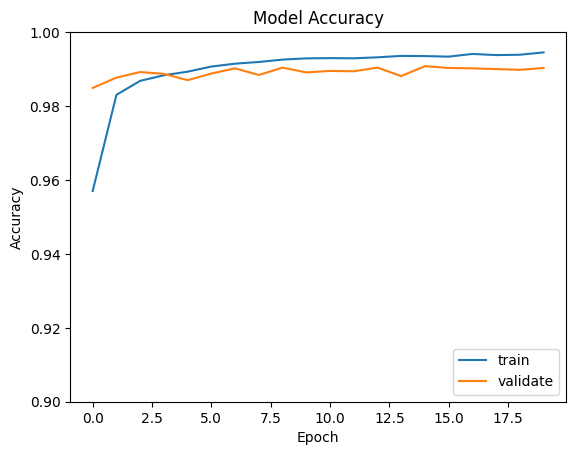

In [16]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

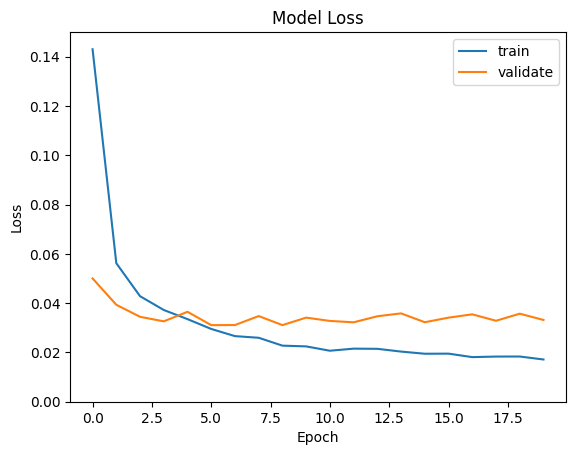

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.15])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()